In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Cleaning</h1>

In [2]:
df = pd.read_csv("../data/StudentPerformanceFactors.csv")
print(df.info())

missing_cols = ["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"]
for col in missing_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())

<class 'pandas.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   str  
 3   Access_to_Resources         6607 non-null   str  
 4   Extracurricular_Activities  6607 non-null   str  
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   str  
 8   Internet_Access             6607 non-null   str  
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   str  
 11  Teacher_Quality             6529 non-null   str  
 12  School_Type                 6607 non-null   str  
 13  Peer_Influence              6607 non-null   str  
 14  Physical_Activity  

<h1>Data Visualization</h1>

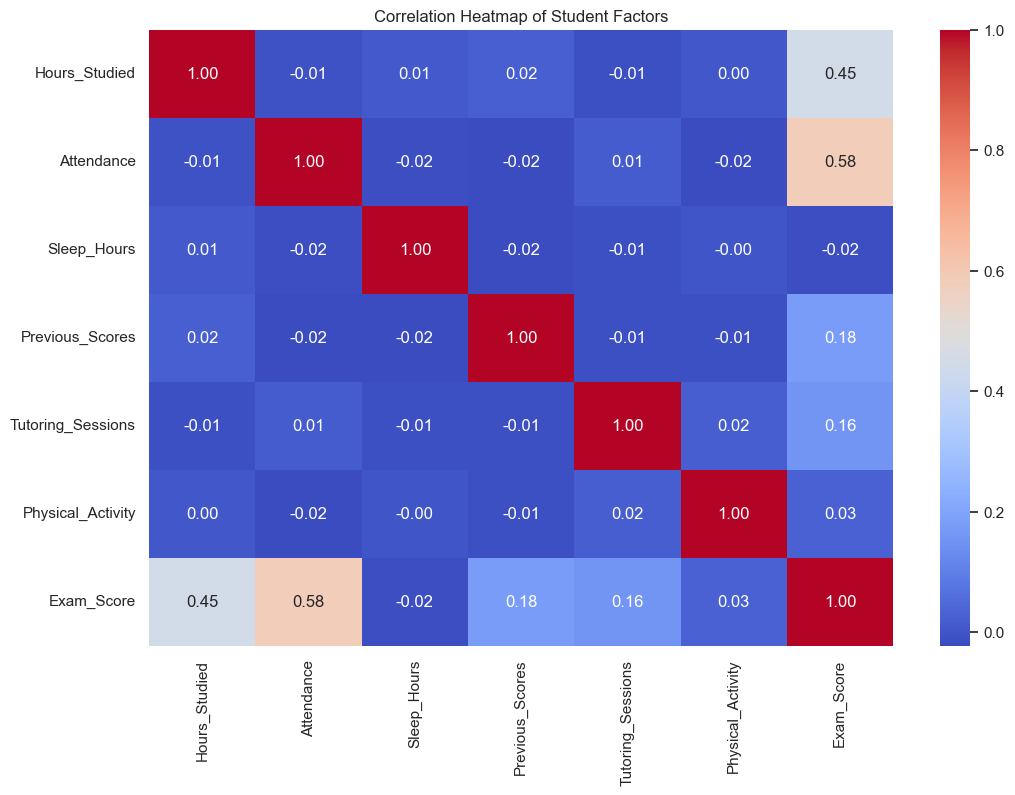

<class 'pandas.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   str  
 3   Access_to_Resources         6607 non-null   str  
 4   Extracurricular_Activities  6607 non-null   str  
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   str  
 8   Internet_Access             6607 non-null   str  
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   str  
 11  Teacher_Quality             6607 non-null   str  
 12  School_Type                 6607 non-null   str  
 13  Peer_Influence              6607 non-null   str  
 14  Physical_Activity  

In [3]:
# Set Style

sns.set_theme(style="whitegrid")
# Create a heatmap for numerical features
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Student Factors")
plt.show()

print(df.info())
# Data Cleaned

<h1>Feature Encoding</h1>

<h1>Sworup</h1>

In [4]:
#Sworup's Code

<h1>Sanjay</h1>

In [5]:
#Sanjay's Code

<h1>Paras</h1>

In [6]:
#Paras's code

<h1>Anjal</h1>

In [7]:
# Anjal's Code
print(df.School_Type.unique())
print(df.Gender.unique())

<StringArray>
['Public', 'Private']
Length: 2, dtype: str
<StringArray>
['Male', 'Female']
Length: 2, dtype: str


In [8]:
#School_Type and Gender mapping
#School_Type-> Public-0, Private-1
df['School_Type']=df['School_Type'].map({'Public': 1, 'Private': 0})
#Gender-> Female-0, Male-1
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [11]:
df[['School_Type','Gender']].sample(3)

,School_Type,Gender
3209,1,1
4070,0,1
1837,0,0


<h1>Kaustuv</h1>

In [10]:
# kaustuv's code